<a href="https://colab.research.google.com/github/starl1ght0/hw_heightweight/blob/main/hw_HeightWeigh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


df = pd.read_csv('../content/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
#1. Перевожу категориальные признаки в количественные
df['Gender'].replace(['Male', 'Female'],
                      [1, 2], inplace=True)

print(df)

      Gender     Height      Weight
0          1  73.847017  241.893563
1          1  68.781904  162.310473
2          1  74.110105  212.740856
3          1  71.730978  220.042470
4          1  69.881796  206.349801
...      ...        ...         ...
9995       2  66.172652  136.777454
9996       2  67.067155  170.867906
9997       2  63.867992  128.475319
9998       2  69.034243  163.852461
9999       2  61.944246  113.649103

[10000 rows x 3 columns]


In [ ]:
#2. Перевожу значения веса и роста в привычные нам (см, кг)

df['Height'] *= 2.54
df['Weight'] *= 0.454

print (df)

      Gender      Height      Weight
0          1  187.571423  109.819678
1          1  174.706036   73.688955
2          1  188.239668   96.584348
3          1  182.196685   99.899282
4          1  177.499761   93.682809
...      ...         ...         ...
9995       2  168.078536   62.096964
9996       2  170.350573   77.574029
9997       2  162.224700   58.327795
9998       2  175.346978   74.389017
9999       2  157.338385   51.596693

[10000 rows x 3 columns]


In [ ]:
#3.1 Разбиваю датасет на 2 датафрейма
df0 = df[df['Gender'] == 1]
df1 = df[df['Gender'] == 2]

print (df0)
print (df1)

      Gender      Height      Weight
0          1  187.571423  109.819678
1          1  174.706036   73.688955
2          1  188.239668   96.584348
3          1  182.196685   99.899282
4          1  177.499761   93.682809
...      ...         ...         ...
4995       1  174.904559   80.417498
4996       1  175.192494   72.315494
4997       1  170.215039   90.434712
4998       1  181.756605   84.401283
4999       1  178.693775   90.301967

[5000 rows x 3 columns]
      Gender      Height     Weight
5000       2  149.633259  46.348100
5001       2  165.684232  64.152843
5002       2  160.957270  59.492797
5003       2  163.779193  58.189866
5004       2  156.954464  58.920759
...      ...         ...        ...
9995       2  168.078536  62.096964
9996       2  170.350573  77.574029
9997       2  162.224700  58.327795
9998       2  175.346978  74.389017
9999       2  157.338385  51.596693

[5000 rows x 3 columns]


In [ ]:
#3.2 Определяю для каждого поля каждого датафрейма средние значения веса и роста
dfa0 = df0[['Height', 'Weight']]. mean (axis= 0 )

dfa1 = df1[['Height', 'Weight']]. mean (axis= 0 )
print(dfa0)
print(dfa1)

Height    175.326919
Weight     84.907362
dtype: float64
Height    161.820285
Weight     61.680482
dtype: float64


In [ ]:
#3.3 Определяю значения квантилей распределения, максимальное и минимальное значение, стандартное отклонение, количество значений.

df0dscr = df0.describe()
df1dscr = df1.describe()

df1dscr

,Gender,Height,Weight
count,5000.0,5000.000000,5000.000000
mean,2.0,161.820285,61.680482
std,0.0,6.848561,8.636200
min,2.0,137.828359,29.373858
25%,2.0,157.211881,55.812080
50%,2.0,161.876547,61.797383
75%,2.0,166.531456,67.560161
max,2.0,186.409548,91.815695


array([[<Axes: title={'center': 'Weight'}>]], dtype=object)

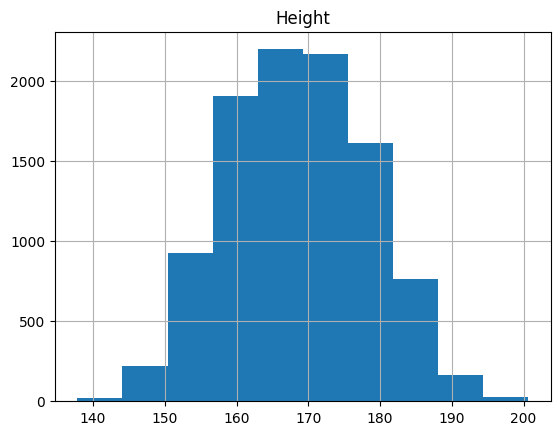

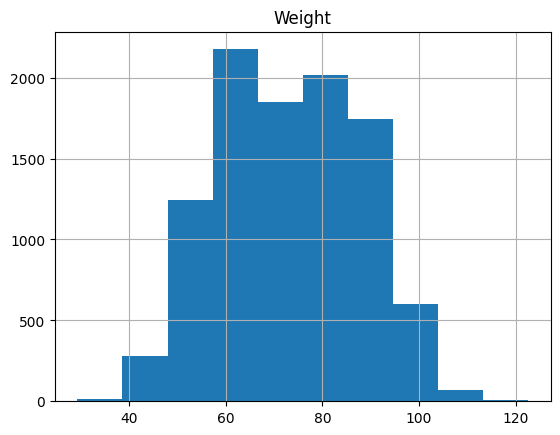

In [ ]:
df.hist (column='Height')
df.hist (column='Weight')

array([[<Axes: title={'center': 'Weight'}>]], dtype=object)

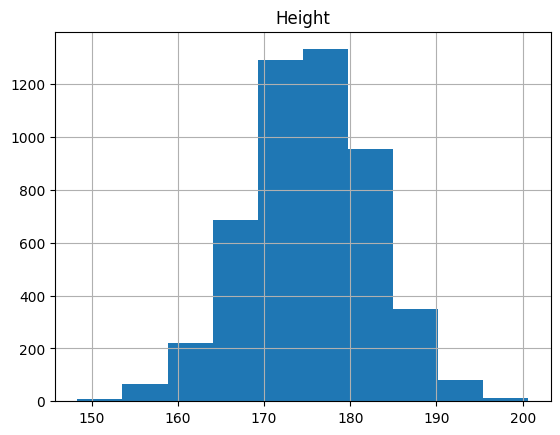

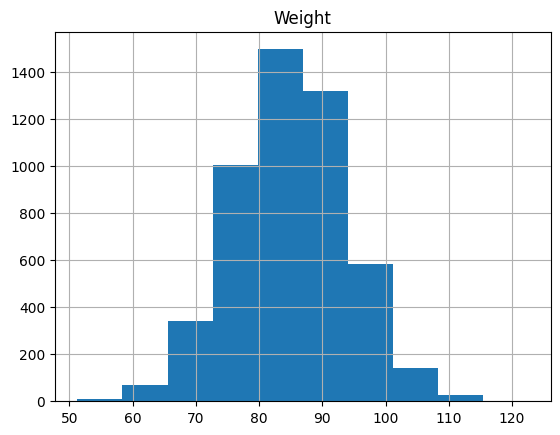

In [ ]:
df0.hist (column='Height')
df0.hist (column='Weight')

array([[<Axes: title={'center': 'Weight'}>]], dtype=object)

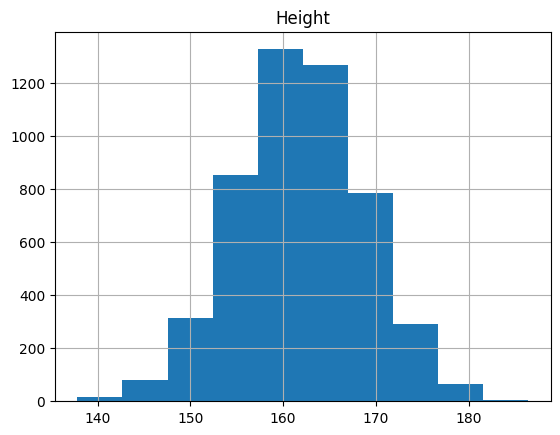

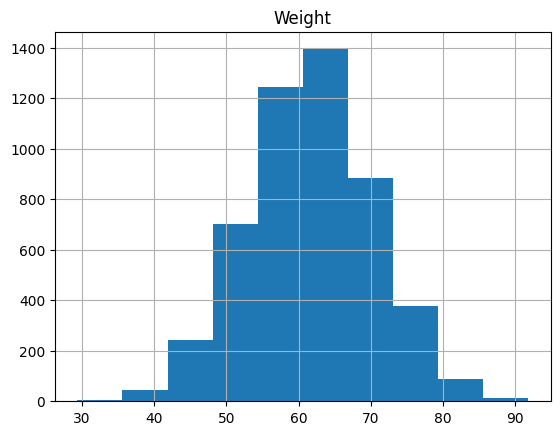

In [ ]:
df1.hist (column='Height')
df1.hist (column='Weight')

In [ ]:
X = df.drop('Gender', axis=1)
kmeans = KMeans(n_clusters=2, random_state=40)
kmeans.fit(X)
predicted_clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
precision = precision_score(df['Gender'], predicted_clusters, average=None)
print(precision)

[0.         0.90176013 0.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
